In [ ]:
# Install Pytesseract
!pip install pytesseract

In [ ]:
# Generic Libraries
from PIL import Image
import os
import pandas as pd
import numpy as np
import re,string,unicodedata

#Tesseract Library
import pytesseract

#Warnings
import warnings
warnings.filterwarnings("ignore")

#Garbage Collection
import gc

#Gensim Library for Text Processing
import gensim.parsing.preprocessing as gsp
from gensim import utils

#TextBlob Library (Sentiment Analysis)
from textblob import TextBlob, Word

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#WordCloud Generator
from wordcloud import WordCloud,STOPWORDS

In [ ]:
# Mount Gogle Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Open Path on Google Drive
dataset_path = '/content/gdrive/MyDrive/dataset_phishing/'

In [ ]:
# Path ke subfolder train, validation, dan test
train_path = dataset_path + 'train/'
validation_path = dataset_path + 'validation/'
test_path = dataset_path + 'test/'

In [ ]:
# Fungsi untuk mengambil daftar file dan label
def get_files_and_labels(folder_path):
    files = []
    labels = []
    for label in ['UnPhising', 'Phising']:
        label_path = folder_path + label + '/'
        for file in os.listdir(label_path):
            if file.endswith('.jpg'):
                files.append(label_path + file)
                labels.append(label)
    return files, labels

In [ ]:
# Fungsi untuk membuat dataframe dan menyimpan ke CSV
def create_csv(folder_path, csv_name):
    files, labels = get_files_and_labels(folder_path)
    data = {'File': files, 'Label': labels}
    df = pd.DataFrame(data)
    df.to_csv(csv_name, index=False)
    print(f'{csv_name} created successfully.')

In [ ]:
# Membuat CSV untuk train, validation, dan test
create_csv(train_path, 'train.csv')
create_csv(validation_path, 'validation.csv')
create_csv(test_path, 'test.csv')

train.csv created successfully.
validation.csv created successfully.
test.csv created successfully.


In [ ]:
# Menampilkan daftar file dalam CSV train
train_df = pd.read_csv('train.csv')
print("Train CSV:")
print(train_df.head())

Train CSV:
                                                File      Label
0  /content/gdrive/MyDrive/dataset_phishing/train...  UnPhising
1  /content/gdrive/MyDrive/dataset_phishing/train...  UnPhising
2  /content/gdrive/MyDrive/dataset_phishing/train...  UnPhising
3  /content/gdrive/MyDrive/dataset_phishing/train...  UnPhising
4  /content/gdrive/MyDrive/dataset_phishing/train...  UnPhising


In [ ]:
# Menampilkan daftar file dalam CSV validation
validation_df = pd.read_csv('validation.csv')
print("\nValidation CSV:")
print(validation_df.head())


Validation CSV:
                                                File      Label
0  /content/gdrive/MyDrive/dataset_phishing/valid...  UnPhising
1  /content/gdrive/MyDrive/dataset_phishing/valid...  UnPhising
2  /content/gdrive/MyDrive/dataset_phishing/valid...  UnPhising
3  /content/gdrive/MyDrive/dataset_phishing/valid...  UnPhising
4  /content/gdrive/MyDrive/dataset_phishing/valid...  UnPhising


In [ ]:
# Menampilkan daftar file dalam CSV test
test_df = pd.read_csv('test.csv')
print("\nTest CSV:")
print(test_df.head())


Test CSV:
                                                File      Label
0  /content/gdrive/MyDrive/dataset_phishing/test/...  UnPhising
1  /content/gdrive/MyDrive/dataset_phishing/test/...  UnPhising
2  /content/gdrive/MyDrive/dataset_phishing/test/...  UnPhising
3  /content/gdrive/MyDrive/dataset_phishing/test/...  UnPhising
4  /content/gdrive/MyDrive/dataset_phishing/test/...  UnPhising


In [ ]:
# Install library tensorflow (jika belum terinstall)
!pip install tensorflow

In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Fungsi untuk menampilkan grafik loss dan akurasi
def plot_history(history):
    plt.figure(figsize=(12, 4))

     # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.show()

In [ ]:
# Fungsi untuk membuat dan melatih model sederhana
def train_model(train_df, validation_df, epochs=10, batch_size=32):
    # Membuat objek ImageDataGenerator
    datagen = ImageDataGenerator(rescale=1./255)

    # Membuat generator untuk data train dan validation
    train_generator = datagen.flow_from_dataframe(
        train_df,
        x_col='File',
        y_col='Label',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary'
    )

    validation_generator = datagen.flow_from_dataframe(
        validation_df,
        x_col='File',
        y_col='Label',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary'
    )

    # Membuat model sederhana
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Latih model
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    # Menampilkan grafik loss dan akurasi
    plot_history(history)

Found 784 validated image filenames belonging to 2 classes.
Found 99 validated image filenames belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - 234s 9s/step - loss: 10.1335 - accuracy: 0.5855 - val_loss: 0.5735 - val_accuracy: 0.8182
Epoch 2/10
25/25 [==============================] - 58s 2s/step - loss: 0.4665 - accuracy: 0.7997 - val_loss: 0.3295 - val_accuracy: 0.8687
Epoch 3/10
25/25 [==============================] - 72s 3s/step - loss: 0.2524 - accuracy: 0.9069 - val_loss: 0.2481 - val_accuracy: 0.8990
Epoch 4/10
25/25 [==============================] - 63s 2s/step - loss: 0.1344 - accuracy: 0.9579 - val_loss: 0.2237 - val_accuracy: 0.8889
Epoch 5/10
25/25 [==============================] - 59s 2s/step - loss: 0.0774 - accuracy: 0.9847 - val_loss: 0.2198 - val_accuracy: 0.8990
Epoch 6/10
25/25 [==============================] - 61s 2s/step - loss: 0.0416 - accuracy: 0.9936 - val_loss: 0.2482 - val_accuracy: 0.8788
Epoch 7/10
25/25 [=====================

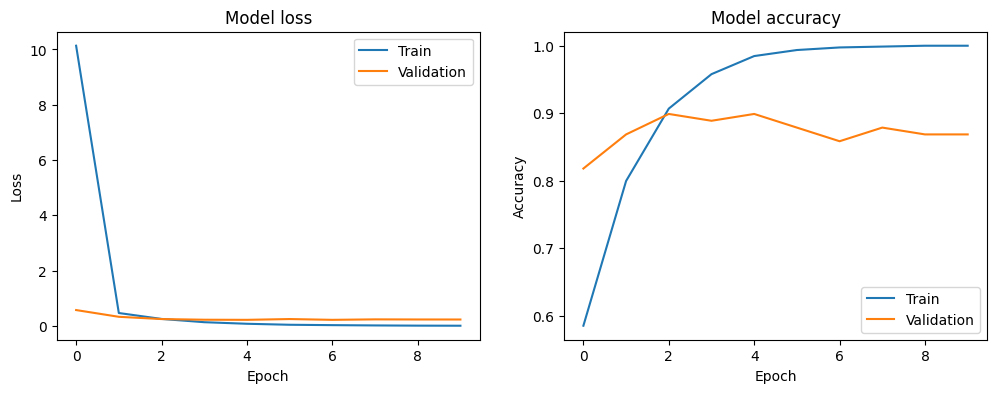

In [ ]:
# Melatih model dengan data train dan validation
train_model(train_df, validation_df, epochs=10, batch_size=32)